In [22]:
!pip3 install pandas
!pip3 install requests
!pip3 install beautifulsoup4

Importing modules 

In [54]:
import pandas as pd
from hh_parser import parse_resumes, create_file_name
from pathlib import Path

Define the search text

In [55]:
search_text = 'react'

Parse resumes if, get `csv` filename in result

In [56]:
possible_file_name = create_file_name(search_text)

already_parsed = Path(possible_file_name).exists()

print(f'"{search_text}" resumes have been already parsed')

file_name = possible_file_name if Path(possible_file_name).exists() else parse_resumes(search_text, 50)

override = input(f'Do you want to parse {search_text} resumes again? (y/n)')

if override == 'y':
    file_name = parse_resumes(search_text, 50)
else:
    print(f'Using existing resumes file: {file_name}')


"react" resumes have been already parsed
Using existing resumes file: react_resumes.csv


Print out the first 20 rows of data frame

In [57]:
df = pd.read_csv(file_name, sep=',', encoding='utf-8')
df.head(20)

,Title,Specialization,Salary,Age,Employment,Work schedule,Experience years,Experience month,Citizenship,Sex
0,Frontend-разработчик(React),"['Программист, разработчик']",305500.0,30.0,NaN,NaN,2.0,8.0,Россия,True
1,Frontend-разработчик,"['Программист, разработчик']",305500.0,NaN,NaN,NaN,10.0,NaN,Казахстан,True
2,"React.js developer (JavaScript, React)","['Программист, разработчик']",NaN,38.0,"стажировка, частичная занятость, полная занятость","полный день, удаленная работа",17.0,11.0,Казахстан,True
3,Middle Frontend Developer (ReactJS + TypeScript),"['Программист, разработчик']",824850.0,25.0,NaN,NaN,2.0,10.0,"Армения, Казахстан",True
4,React developer,"['Программист, разработчик']",488800.0,27.0,NaN,NaN,1.0,9.0,Россия,True
5,Frontend-разработчик,"['Programmer, developer']",NaN,28.0,full time,full day,3.0,4.0,Россия,False
6,Frontend разработчик (React js),"['Программист, разработчик']",NaN,24.0,"частичная занятость, полная занятость","гибкий график, полный день, сменный график, уд...",4.0,1.0,Казахстан,True
7,Full Stack Developer (React),"['Programmer, developer']",404478.0,19.0,NaN,NaN,1.0,8.0,Узбекистан,False
8,Frontend-разработчик,"['Программист, разработчик']",NaN,25.0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",6.0,2.0,Казахстан,True
9,Data analyst,"['Аналитик', 'Программист, разработчик', 'Дата...",NaN,23.0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",1.0,4.0,Казахстан,True


Sort resumes by salary

In [58]:
def sort_by_salary(df):
    df = df.sort_values(by=['Salary'], ascending=False)
    return df


sort_by_salary(df).head(10)

,Title,Specialization,Salary,Age,Employment,Work schedule,Experience years,Experience month,Citizenship,Sex
22,Ruby Developer,"['Programmer, developer']",1572970.0,51.0,NaN,NaN,7.0,10.0,Казахстан,False
24,"Frontend developer (React, Vue, TS)","['Программист, разработчик']",1123550.0,23.0,NaN,NaN,2.0,7.0,Казахстан,True
36,"Back:Python Django DRF, Front: React, MobileDe...","['Программист, разработчик']",1000000.0,32.0,NaN,NaN,8.0,3.0,Казахстан,True
23,"Frontend-разработчик (React, Vue) - Middle","['Программист, разработчик']",916500.0,26.0,NaN,NaN,5.0,4.0,Россия,True
3,Middle Frontend Developer (ReactJS + TypeScript),"['Программист, разработчик']",824850.0,25.0,NaN,NaN,2.0,10.0,"Армения, Казахстан",True
32,Frontend разработчик,"['Программист, разработчик']",733200.0,21.0,NaN,NaN,1.0,3.0,Россия,True
18,Frontend Developer (ReactJS),"['Руководитель группы разработки', 'Программис...",700000.0,22.0,NaN,NaN,4.0,3.0,Казахстан,True
16,React frontend developer,"['Программист, разработчик']",611000.0,22.0,NaN,NaN,1.0,7.0,Казахстан,True
30,"Frontend Developer (JS, React, Vue, TS)","['Программист, разработчик']",500000.0,21.0,NaN,NaN,2.0,1.0,Казахстан,True
4,React developer,"['Программист, разработчик']",488800.0,27.0,NaN,NaN,1.0,9.0,Россия,True


Sort by age

In [59]:
def sort_by_age(df):
    df = df.sort_values(by=['Age'], ascending=False)
    return df

sort_by_age(df).head(10)

,Title,Specialization,Salary,Age,Employment,Work schedule,Experience years,Experience month,Citizenship,Sex
27,Главный инженер-программист,"['Программист, разработчик']",449420.0,54.0,NaN,NaN,14.0,10.0,Казахстан,True
22,Ruby Developer,"['Programmer, developer']",1572970.0,51.0,NaN,NaN,7.0,10.0,Казахстан,False
46,Frontend разработчик,"['Programmer, developer']",NaN,41.0,full time,full day,9.0,NaN,Казахстан,False
2,"React.js developer (JavaScript, React)","['Программист, разработчик']",NaN,38.0,"стажировка, частичная занятость, полная занятость","полный день, удаленная работа",17.0,11.0,Казахстан,True
11,"Web-программист, java script-разработчик, Reac...","['Программист, разработчик']",NaN,37.0,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",6.0,2.0,Казахстан,True
17,Frontend Developer (ReactJS),"['Программист, разработчик']",NaN,32.0,полная занятость,полный день,10.0,3.0,Казахстан,True
36,"Back:Python Django DRF, Front: React, MobileDe...","['Программист, разработчик']",1000000.0,32.0,NaN,NaN,8.0,3.0,Казахстан,True
34,Frontend-разработчик,"['Программист, разработчик']",NaN,31.0,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",10.0,2.0,Россия,True
29,Frontend Developer (React / Vue),"['Программист, разработчик']",NaN,30.0,"стажировка, частичная занятость, проектная раб...","гибкий график, полный день, сменный график, уд...",NaN,NaN,Казахстан,True
0,Frontend-разработчик(React),"['Программист, разработчик']",305500.0,30.0,NaN,NaN,2.0,8.0,Россия,True


Sort by experience

In [60]:
def sort_by_experience(df):
    df['Experience years'] = df['Experience years'] + df['Experience month'] / 12
    df = df.sort_values(by=['Experience years'], ascending=False)
    return df

sort_by_experience(df).head(10)

,Title,Specialization,Salary,Age,Employment,Work schedule,Experience years,Experience month,Citizenship,Sex
2,"React.js developer (JavaScript, React)","['Программист, разработчик']",NaN,38.0,"стажировка, частичная занятость, полная занятость","полный день, удаленная работа",17.916667,11.0,Казахстан,True
27,Главный инженер-программист,"['Программист, разработчик']",449420.0,54.0,NaN,NaN,14.833333,10.0,Казахстан,True
26,"frontend разработчик (react, react-native), пр...","['Программист, разработчик', 'Учитель, препода...",NaN,29.0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, вахтовый метод, уд...",10.916667,11.0,Казахстан,True
17,Frontend Developer (ReactJS),"['Программист, разработчик']",NaN,32.0,полная занятость,полный день,10.250000,3.0,Казахстан,True
34,Frontend-разработчик,"['Программист, разработчик']",NaN,31.0,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",10.166667,2.0,Россия,True
44,Front-end-разработчик,"['Программист, разработчик']",NaN,29.0,"стажировка, полная занятость",полный день,9.750000,9.0,Казахстан,True
33,"React native dev, QA engineer, Front-end (angu...","['Руководитель группы разработки', 'Программис...",NaN,30.0,полная занятость,"полный день, удаленная работа",8.750000,9.0,Казахстан,True
36,"Back:Python Django DRF, Front: React, MobileDe...","['Программист, разработчик']",1000000.0,32.0,NaN,NaN,8.250000,3.0,Казахстан,True
22,Ruby Developer,"['Programmer, developer']",1572970.0,51.0,NaN,NaN,7.833333,10.0,Казахстан,False
25,Frontend developer (React),"['Программист, разработчик']",NaN,29.0,"частичная занятость, полная занятость","гибкий график, полный день, удаленная работа",6.916667,11.0,Казахстан,True


Sort by title

In [61]:
def sort_by_title(df):
    df = df.sort_values(by=['Title'], ascending=True)
    return df

sort_by_title(df).head(10)


,Title,Specialization,Salary,Age,Employment,Work schedule,Experience years,Experience month,Citizenship,Sex
20,Angular/React/Vue Developer,"['Программист, разработчик']",NaN,21.0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",1.750000,9.0,Казахстан,True
36,"Back:Python Django DRF, Front: React, MobileDe...","['Программист, разработчик']",1000000.0,32.0,NaN,NaN,8.250000,3.0,Казахстан,True
9,Data analyst,"['Аналитик', 'Программист, разработчик', 'Дата...",NaN,23.0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",1.333333,4.0,Казахстан,True
21,Front end (React | TS) 💻 | Mobile ( React nati...,"['Программист, разработчик', 'Специалист техни...",NaN,22.0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",2.500000,6.0,Кыргызстан,True
44,Front-end-разработчик,"['Программист, разработчик']",NaN,29.0,"стажировка, полная занятость",полный день,9.750000,9.0,Казахстан,True
30,"Frontend Developer (JS, React, Vue, TS)","['Программист, разработчик']",500000.0,21.0,NaN,NaN,2.083333,1.0,Казахстан,True
29,Frontend Developer (React / Vue),"['Программист, разработчик']",NaN,30.0,"стажировка, частичная занятость, проектная раб...","гибкий график, полный день, сменный график, уд...",NaN,NaN,Казахстан,True
18,Frontend Developer (ReactJS),"['Руководитель группы разработки', 'Программис...",700000.0,22.0,NaN,NaN,4.250000,3.0,Казахстан,True
17,Frontend Developer (ReactJS),"['Программист, разработчик']",NaN,32.0,полная занятость,полный день,10.250000,3.0,Казахстан,True
37,Frontend Developer(React),['Другое'],150000.0,26.0,NaN,NaN,NaN,NaN,Казахстан,True


Minimum, maximum and mean average of the salary of all

In [62]:
min_salary = df['Salary'].min()
max_salary = df['Salary'].max()
mean_salary = df['Salary'].mean()

print(f"Minimum salary: {min_salary:,.0f}")
print(f"Maximum salary: {max_salary:,.0f}")
print(f"Mean salary: {mean_salary:,.0f}")


Minimum salary: 120,000
Maximum salary: 1,572,970
Mean salary: 590,036


Minimum, maximum and mean average of the salary of each sex, specialization and citizenship

In [63]:
grouped_by_sex = df.groupby(['Sex'])

def get_salary_stats(group):
    min_salary = group.min()
    max_salary = group.max()
    mean_salary = group.mean()

    stats = pd.concat(
        [min_salary, max_salary, mean_salary], axis=1)
    stats.columns = ['Min Salary', 'Max Salary', 'Mean Salary']

    return stats


gender_salary = get_salary_stats(grouped_by_sex['Salary'])

print(gender_salary)


       Min Salary  Max Salary  Mean Salary
Sex                                       
False    404478.0   1572970.0    808956.00
True     120000.0   1123550.0    548988.75


In [64]:
citizenship_grouped = df.groupby(['Citizenship'])

citizenship_salary = get_salary_stats(citizenship_grouped['Salary'])

print(citizenship_salary)


                    Min Salary  Max Salary    Mean Salary
Citizenship                                              
Армения, Казахстан    824850.0    824850.0  824850.000000
Казахстан             120000.0   1572970.0  616585.454545
Кыргызстан                 NaN         NaN            NaN
Россия                305500.0    916500.0  611000.000000
Туркменистан          305500.0    305500.0  305500.000000
Узбекистан            404478.0    449420.0  426949.000000


In [65]:
specializations = df['Specialization'].unique()

specialization_stats = []

for specialization in specializations:
    specialization_df = df[df['Specialization'] == specialization]
    specialization_grouped = specialization_df.groupby(
        ['Specialization'])

    stats = get_salary_stats(specialization_grouped['Salary'])
    stats.reset_index(inplace=True)

    specialization_stats.append(stats)

specialization_stats_df = pd.concat(specialization_stats, axis=0)
specialization_stats_df = specialization_stats_df.dropna()
specialization_stats_df.sort_values(by=['Mean Salary'], ascending=False)


,Specialization,Min Salary,Max Salary,Mean Salary
0,"['Programmer, developer']",404478.0,1572970.0,808956.000000
0,"['Руководитель группы разработки', 'Программис...",700000.0,700000.0,700000.000000
0,"['Программист, разработчик']",120000.0,1123550.0,586793.846154
0,"['Другое', 'Программист, разработчик']",305500.0,305500.0,305500.000000
0,['Другое'],150000.0,150000.0,150000.000000


Count of males, famales and the CVs of people from each country

In [66]:
resumes_per_gender = df.groupby('Citizenship')['Sex'].value_counts().unstack(fill_value=0)
resumes_per_gender = resumes_per_gender.rename(
    columns={True: 'Men', False: 'Women'})
resumes_per_gender.columns.name = None
resumes_per_gender.index.name = None

print(resumes_per_gender)


                    Women  Men
Армения, Казахстан      0    1
Казахстан               4   32
Кыргызстан              0    1
Россия                  2    7
Туркменистан            0    1
Узбекистан              2    0


Charts

<AxesSubplot: title={'center': 'Salary by citizenship'}, xlabel='Citizenship'>

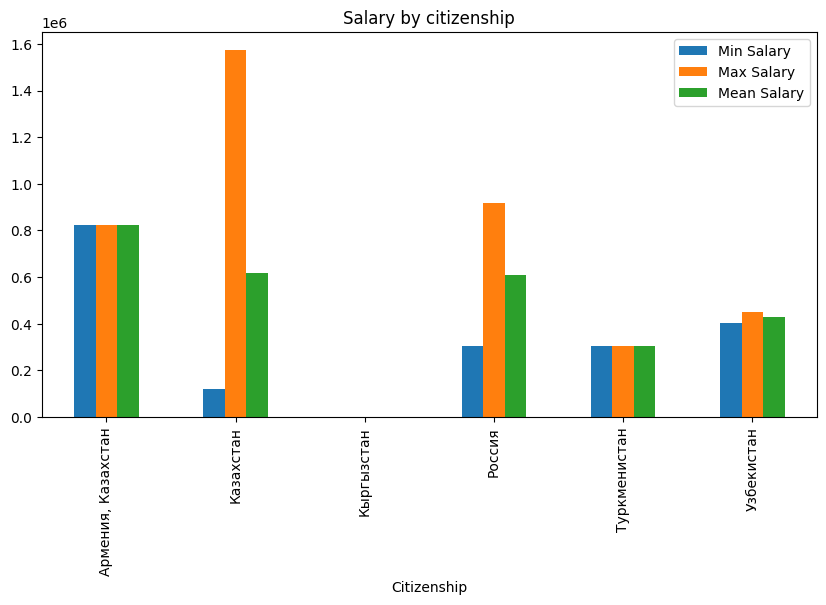

In [67]:
citizenship_salary.plot(kind='bar', figsize=(10, 5), title='Salary by citizenship')

<AxesSubplot: title={'center': 'Salary by experience'}, xlabel='Experience years', ylabel='Salary'>

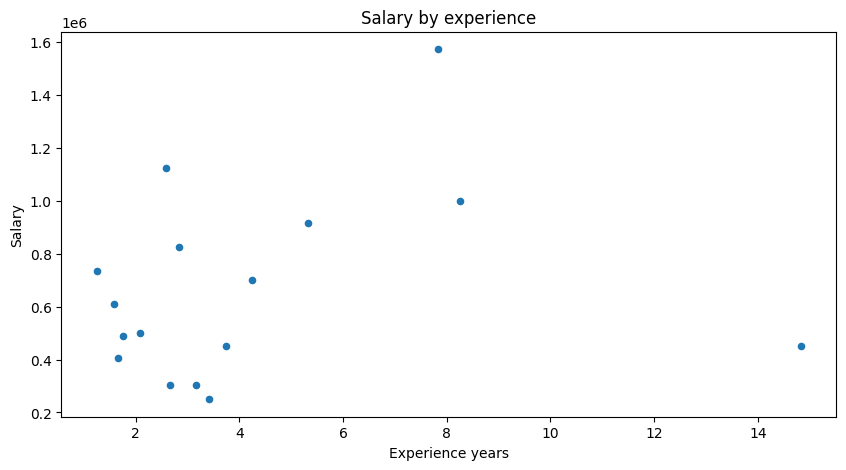

In [68]:
experience_salary = df[['Experience years', 'Salary']]
experience_salary = experience_salary.sort_values(by=['Experience years'], ascending=True)
 
experience_salary.plot(kind='scatter', x='Experience years', y='Salary', figsize=(10, 5), title='Salary by experience')


<AxesSubplot: title={'center': 'Gender by citizenship'}>

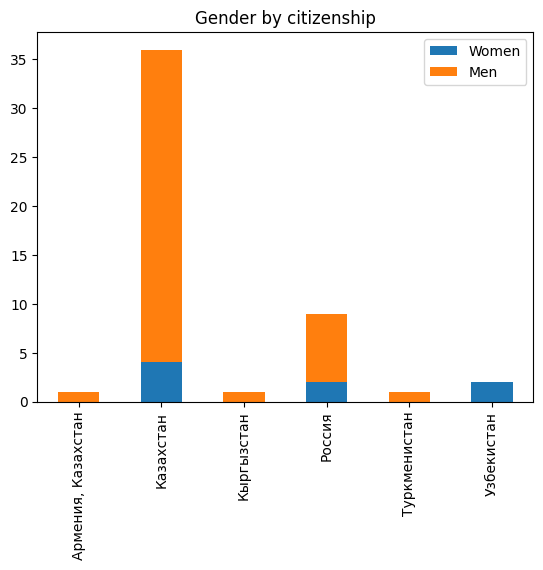

In [69]:
resumes_per_gender.plot(kind='bar', stacked=True, title='Gender by citizenship')


<AxesSubplot: xlabel='Sex'>

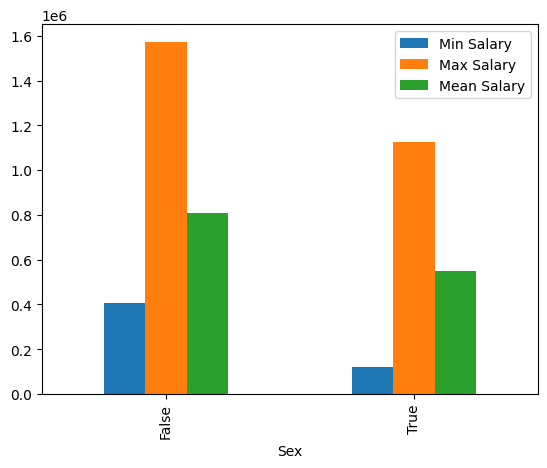

In [70]:
gender_salary.plot(kind='bar')

<AxesSubplot: title={'center': 'Mean salary by specialization'}, xlabel='Specialization'>

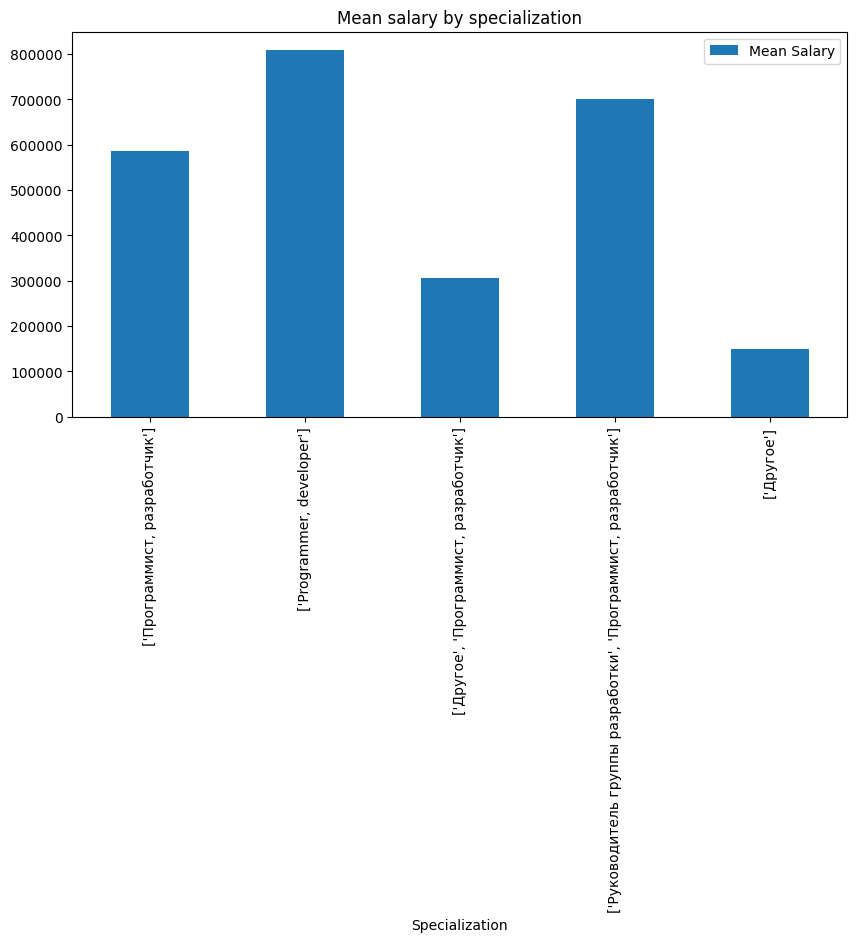

In [71]:
specialization_stats_df.plot(kind='bar', x='Specialization', y='Mean Salary', figsize=(10, 5), title='Mean salary by specialization')